# Spotify Data Exploration

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')
%matplotlib inline

## Reading in the data

First, we'll read in the data and generate some summary statistics

In [3]:
spotify = pd.read_csv("track_features_edited.csv")

In [3]:
spotify.shape

(20026, 18)

In [4]:
spotify.head()

,trackID,endTime,artistName,trackName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7Jh1bpe76CNTCgdgAdBw4Z,19/01/2019 17:01,David Bowie,Heroes - 2017 Remaster,18982,0.490,0.758,7.0,-6.491,1.0,0.0297,0.000671,0.484000,0.092,0.435,112.114,371413.0,4.0
1,5ihS6UUlyQAfmp48eSkxuQ,20/01/2019 11:15,Fleetwood Mac,Landslide,199493,0.414,0.161,7.0,-22.320,0.0,0.0318,0.883000,0.000223,0.117,0.423,159.375,199493.0,4.0
2,5RgFlk1fcClZd0Y4SGYhqH,20/01/2019 11:18,Billy Joel,She's Always a Woman,201373,0.292,0.324,3.0,-11.996,1.0,0.0346,0.797000,0.000473,0.120,0.384,176.631,201373.0,3.0
3,6dGnYIeXmHdcikdzNNDMm2,20/01/2019 11:21,The Beatles,Here Comes The Sun - Remastered 2009,185733,0.557,0.540,9.0,-10.484,1.0,0.0347,0.033900,0.002480,0.179,0.394,129.171,185733.0,4.0
4,2TVxnKdb3tqe1nhQWwwZCO,20/01/2019 11:27,Elton John,Tiny Dancer,377093,0.414,0.428,0.0,-11.097,1.0,0.0278,0.382000,0.000243,0.148,0.282,145.075,377093.0,4.0


In [5]:
spotify.describe()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2.002600e+04,19018.000000,19018.000000,19018.000000,19018.000000,19018.000000,19018.000000,19018.000000,19018.000000,19018.000000,19018.000000,19018.000000,1.901800e+04,19018.000000
mean,1.922055e+05,0.551611,0.585098,5.173783,-8.391702,0.755495,0.054660,0.328955,0.065081,0.159127,0.442244,121.708412,2.285791e+05,3.905090
std,9.175821e+04,0.146804,0.248231,3.622296,4.816931,0.429805,0.053175,0.339638,0.212156,0.115866,0.229336,28.138664,7.160528e+04,0.402423
min,0.000000e+00,0.000000,0.000020,0.000000,-41.057000,0.000000,0.000000,0.000002,0.000000,0.021900,0.000000,0.000000,1.846700e+04,0.000000
25%,1.671935e+05,0.466000,0.416000,2.000000,-10.253000,1.000000,0.031300,0.014700,0.000000,0.094100,0.282000,100.043000,1.958670e+05,4.000000
50%,2.061110e+05,0.553000,0.595000,5.000000,-7.130000,1.000000,0.039200,0.194000,0.000007,0.116000,0.417000,121.959000,2.182220e+05,4.000000
75%,2.358000e+05,0.646000,0.788000,9.000000,-5.259000,1.000000,0.054900,0.658000,0.000939,0.179000,0.603000,136.901000,2.464530e+05,4.000000
max,2.164610e+06,0.949000,0.988000,11.000000,-0.946000,1.000000,0.788000,0.996000,1.000000,0.993000,0.985000,208.951000,3.631718e+06,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9af86945e0>,
      dtype=object)

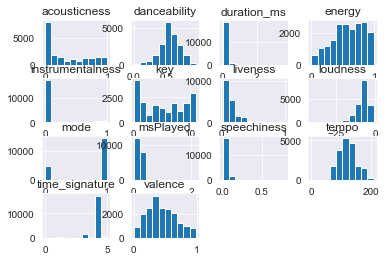

In [6]:
spotify.hist()

## First, we'll explore some features of interest

### How many unique tracks are there? 

In [7]:
spotify['trackID'].nunique()

4174

### What proportion of each song do I listen to?

In [8]:
spotify['ms_prop'] = spotify['msPlayed']/spotify['duration_ms']

In [9]:
spotify['ms_prop'].describe()

count    19018.000000
mean         0.851818
std          0.356467
min          0.000000
25%          0.991978
50%          0.999996
75%          1.000000
max          6.542732
Name: ms_prop, dtype: float64

Interesting... Max is 6 - this shouldn't be possible as you can't listen to a song for longer than it lasts. This probably means we have matched the wrong data from the API for these songs. We'll need to go back and refine the search, instead of always taking the top result from the API search call. 

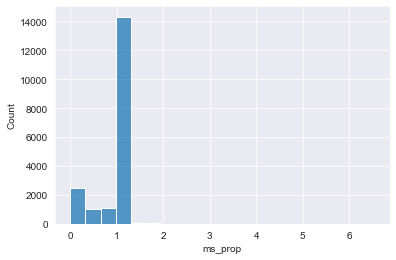

In [20]:
sns.histplot(spotify['ms_prop'], bins=20)

So, how many songs look a bit dodgy? 

In [11]:
dodgy = spotify[['trackID', 'ms_prop']]
dodgy = dodgy[(dodgy.ms_prop > 1)]
dodgy['trackID'].nunique()

342

And how many did I listen to for less than 15 seconds? NB This is out of 20,026 listens in total

In [12]:
sum(spotify['msPlayed'] < 15000)

1516

### How many different artists am I listening to?

The number of listens to each artist:

In [13]:
artist_counts = pd.Series(spotify['artistName'].value_counts())
artist_counts.head(10)

The 1975           702
Busted             694
Mayday Parade      628
This Wild Life     423
Ed Sheeran         302
DJ Spoony          292
Unknown Artist     246
Fleetwood Mac      244
Dixie Chicks       234
With Confidence    226
Name: artistName, dtype: int64

Also telling that 'Unknown Artist' is up here - this may be another API issue to explore

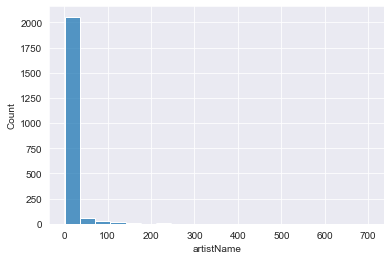

In [21]:
sns.histplot(artist_counts, stat="count", bins=20)

It's a long tailed distribution, and looks like the majority of artists I listen to 50 times or less. 
So, how many do I listen to more than 100 times? 

In [16]:
sum(artist_counts > 100)

37

## Distributions across time

I'd like to see how listening frequencies change depending on the time of day or day of the week. 

In [23]:
spotify['datetime'] = pd.to_datetime(spotify['endTime'], dayfirst=True)

In [24]:
spotify['datetime'].head()

0   2019-01-19 17:01:00
1   2019-01-20 11:15:00
2   2019-01-20 11:18:00
3   2019-01-20 11:21:00
4   2019-01-20 11:27:00
Name: datetime, dtype: datetime64[ns]

In [25]:
spotify_dates = spotify.set_index('datetime')

In [26]:
spotify_dates.head()

,trackID,endTime,artistName,trackName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,ms_prop
datetime,,,,,,,,,,,,,,,,,,,
2019-01-19 17:01:00,7Jh1bpe76CNTCgdgAdBw4Z,19/01/2019 17:01,David Bowie,Heroes - 2017 Remaster,18982,0.490,0.758,7.0,-6.491,1.0,0.0297,0.000671,0.484000,0.092,0.435,112.114,371413.0,4.0,0.051108
2019-01-20 11:15:00,5ihS6UUlyQAfmp48eSkxuQ,20/01/2019 11:15,Fleetwood Mac,Landslide,199493,0.414,0.161,7.0,-22.320,0.0,0.0318,0.883000,0.000223,0.117,0.423,159.375,199493.0,4.0,1.000000
2019-01-20 11:18:00,5RgFlk1fcClZd0Y4SGYhqH,20/01/2019 11:18,Billy Joel,She's Always a Woman,201373,0.292,0.324,3.0,-11.996,1.0,0.0346,0.797000,0.000473,0.120,0.384,176.631,201373.0,3.0,1.000000
2019-01-20 11:21:00,6dGnYIeXmHdcikdzNNDMm2,20/01/2019 11:21,The Beatles,Here Comes The Sun - Remastered 2009,185733,0.557,0.540,9.0,-10.484,1.0,0.0347,0.033900,0.002480,0.179,0.394,129.171,185733.0,4.0,1.000000
2019-01-20 11:27:00,2TVxnKdb3tqe1nhQWwwZCO,20/01/2019 11:27,Elton John,Tiny Dancer,377093,0.414,0.428,0.0,-11.097,1.0,0.0278,0.382000,0.000243,0.148,0.282,145.075,377093.0,4.0,1.000000


In [48]:
daily_listens = spotify_dates['trackID'].groupby(spotify_dates.index.date).count()

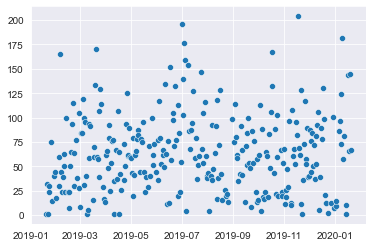

In [54]:
sns.scatterplot(x=daily_listens.index, y=daily_listens.values)

In [83]:
spotify_dates['wday'] = spotify_dates.index.day_name()
spotify_dates['month'] = spotify_dates.index.month_name()
spotify_dates['hour'] = spotify_dates.index.hour

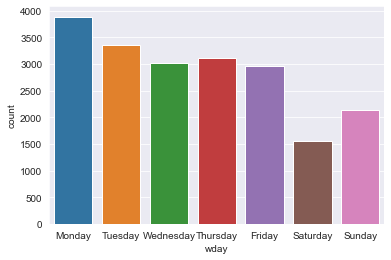

In [74]:
sns.countplot(x=spotify_dates['wday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

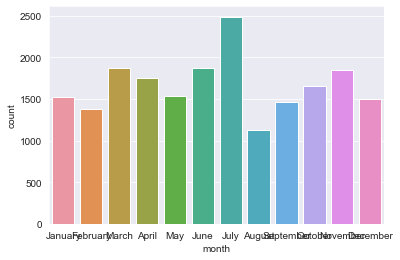

In [80]:
sns.countplot(x=spotify_dates['month'])

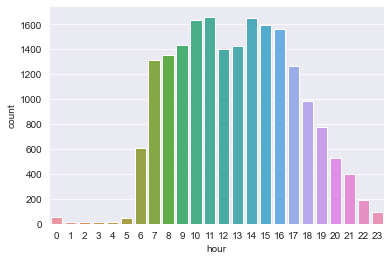

In [85]:
sns.countplot(x=spotify_dates['hour'])

## Clustering

In [4]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator

In [5]:
spotify.head()

,trackID,endTime,artistName,trackName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7Jh1bpe76CNTCgdgAdBw4Z,19/01/2019 17:01,David Bowie,Heroes - 2017 Remaster,18982,0.490,0.758,7.0,-6.491,1.0,0.0297,0.000671,0.484000,0.092,0.435,112.114,371413.0,4.0
1,5ihS6UUlyQAfmp48eSkxuQ,20/01/2019 11:15,Fleetwood Mac,Landslide,199493,0.414,0.161,7.0,-22.320,0.0,0.0318,0.883000,0.000223,0.117,0.423,159.375,199493.0,4.0
2,5RgFlk1fcClZd0Y4SGYhqH,20/01/2019 11:18,Billy Joel,She's Always a Woman,201373,0.292,0.324,3.0,-11.996,1.0,0.0346,0.797000,0.000473,0.120,0.384,176.631,201373.0,3.0
3,6dGnYIeXmHdcikdzNNDMm2,20/01/2019 11:21,The Beatles,Here Comes The Sun - Remastered 2009,185733,0.557,0.540,9.0,-10.484,1.0,0.0347,0.033900,0.002480,0.179,0.394,129.171,185733.0,4.0
4,2TVxnKdb3tqe1nhQWwwZCO,20/01/2019 11:27,Elton John,Tiny Dancer,377093,0.414,0.428,0.0,-11.097,1.0,0.0278,0.382000,0.000243,0.148,0.282,145.075,377093.0,4.0


First need to get a list of unique songs, their numeric information and re-scale the variables. 

In [6]:
# Get rid of the features that are unique to each listening event 
spotify_unique = spotify.drop(columns=['msPlayed', 'endTime']).dropna().drop_duplicates(subset=['trackID'])
spotify_unique.shape

(4174, 16)

In [7]:
# Check we only have one of each trackID
spotify_unique['trackID'].is_unique

True

In [8]:
# Make the trackID the index. 
spotify_unique.set_index(keys=['trackID'], drop=True, inplace=True)

Now we need to remove the non-numeric columns, including ones using numbers for categories (these are: key, mode, time_signature).

In [11]:
spotify_num = spotify_unique.select_dtypes(include=[np.number]).copy()
spotify_num.drop(columns=['key', 'mode', 'time_signature', 'duration_ms'], inplace=True)
spotify_num.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
trackID,,,,,,,,,
7Jh1bpe76CNTCgdgAdBw4Z,0.490,0.758,-6.491,0.0297,0.000671,0.484000,0.092,0.435,112.114
5ihS6UUlyQAfmp48eSkxuQ,0.414,0.161,-22.320,0.0318,0.883000,0.000223,0.117,0.423,159.375
5RgFlk1fcClZd0Y4SGYhqH,0.292,0.324,-11.996,0.0346,0.797000,0.000473,0.120,0.384,176.631
6dGnYIeXmHdcikdzNNDMm2,0.557,0.540,-10.484,0.0347,0.033900,0.002480,0.179,0.394,129.171
2TVxnKdb3tqe1nhQWwwZCO,0.414,0.428,-11.097,0.0278,0.382000,0.000243,0.148,0.282,145.075


In [8]:
# Now lets rescale
scaler = MinMaxScaler()
spotify_km = scaler.fit_transform(spotify_num)

We now have a working dataset. Next task, find the optimal number of clusters.
Estimate optimal clusters using [kneed](https://github.com/arvkevi/kneed) package.

In [10]:
# Calulcate SSE for various options of k
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(spotify_km)
    sse.append(kmeans.inertia_)

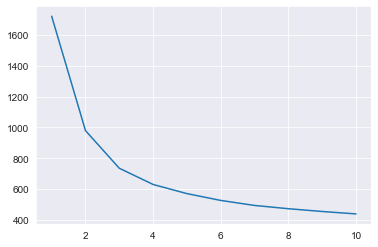

In [18]:
sns.lineplot(x=range(1,11), y=sse)

In [21]:
# See what the kneed package has to say about the optimal number
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

The kneed algorithm identified three clusters as optimal, and that looks reasonable from the graph too so lets try that. 

In [12]:
# Set the preprocessing steps
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

# Set the clustering settings
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=3,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)
# Create the composite pipeline
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [13]:
labels = pipe.fit_predict(spotify_num)

In [14]:
# First get a dataframe of the two PCA components
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(spotify_num),
    columns=["component_1", "component_2"],
)
# Now, add the assigned label from kmeans to each row
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
# Reassign the original index so we know which song is which
pcadf.index = spotify_num.index

In [15]:
pcadf.head()

,component_1,component_2,predicted_cluster
trackID,,,
7Jh1bpe76CNTCgdgAdBw4Z,-0.273469,0.467830,0
5ihS6UUlyQAfmp48eSkxuQ,0.589778,-0.252732,1
5RgFlk1fcClZd0Y4SGYhqH,0.410723,-0.128994,1
6dGnYIeXmHdcikdzNNDMm2,-0.265331,0.115529,0
2TVxnKdb3tqe1nhQWwwZCO,0.088955,0.056649,1


In [16]:
pcadf['predicted_cluster'].value_counts()

0    2327
1    1482
2     365
Name: predicted_cluster, dtype: int64

In [17]:
pcadf.shape

(4174, 3)

To make an interesting plot of this I would like to know which artist and song each of these is. We can match on trackID and get the information from the Spotify dataframe. 

In [92]:
spotify_kmeans  = pcadf.join(spotify_unique, how="left")

In [93]:
spotify_kmeans.head()

,component_1,component_2,predicted_cluster,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
trackID,,,,,,,,,,,,,,,,,,
7Jh1bpe76CNTCgdgAdBw4Z,-0.273469,0.467830,0,David Bowie,Heroes - 2017 Remaster,0.490,0.758,7.0,-6.491,1.0,0.0297,0.000671,0.484000,0.092,0.435,112.114,371413.0,4.0
5ihS6UUlyQAfmp48eSkxuQ,0.589778,-0.252732,1,Fleetwood Mac,Landslide,0.414,0.161,7.0,-22.320,0.0,0.0318,0.883000,0.000223,0.117,0.423,159.375,199493.0,4.0
5RgFlk1fcClZd0Y4SGYhqH,0.410723,-0.128994,1,Billy Joel,She's Always a Woman,0.292,0.324,3.0,-11.996,1.0,0.0346,0.797000,0.000473,0.120,0.384,176.631,201373.0,3.0
6dGnYIeXmHdcikdzNNDMm2,-0.265331,0.115529,0,The Beatles,Here Comes The Sun - Remastered 2009,0.557,0.540,9.0,-10.484,1.0,0.0347,0.033900,0.002480,0.179,0.394,129.171,185733.0,4.0
2TVxnKdb3tqe1nhQWwwZCO,0.088955,0.056649,1,Elton John,Tiny Dancer,0.414,0.428,0.0,-11.097,1.0,0.0278,0.382000,0.000243,0.148,0.282,145.075,377093.0,4.0


In [94]:
# Make the predicted cluster a string
spotify_kmeans['predicted_cluster'] = spotify_kmeans['predicted_cluster'].apply(str)

In [95]:
spotify_kmeans.head()

,component_1,component_2,predicted_cluster,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
trackID,,,,,,,,,,,,,,,,,,
7Jh1bpe76CNTCgdgAdBw4Z,-0.273469,0.467830,0,David Bowie,Heroes - 2017 Remaster,0.490,0.758,7.0,-6.491,1.0,0.0297,0.000671,0.484000,0.092,0.435,112.114,371413.0,4.0
5ihS6UUlyQAfmp48eSkxuQ,0.589778,-0.252732,1,Fleetwood Mac,Landslide,0.414,0.161,7.0,-22.320,0.0,0.0318,0.883000,0.000223,0.117,0.423,159.375,199493.0,4.0
5RgFlk1fcClZd0Y4SGYhqH,0.410723,-0.128994,1,Billy Joel,She's Always a Woman,0.292,0.324,3.0,-11.996,1.0,0.0346,0.797000,0.000473,0.120,0.384,176.631,201373.0,3.0
6dGnYIeXmHdcikdzNNDMm2,-0.265331,0.115529,0,The Beatles,Here Comes The Sun - Remastered 2009,0.557,0.540,9.0,-10.484,1.0,0.0347,0.033900,0.002480,0.179,0.394,129.171,185733.0,4.0
2TVxnKdb3tqe1nhQWwwZCO,0.088955,0.056649,1,Elton John,Tiny Dancer,0.414,0.428,0.0,-11.097,1.0,0.0278,0.382000,0.000243,0.148,0.282,145.075,377093.0,4.0


### Plotting the clusters

In [87]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook, reset_output
from bokeh.transform import factor_cmap
from bokeh.palettes import brewer

In [106]:
# Set the interactive options on the plot
TOOLS="hover,zoom_in,zoom_out,reset,save"

# Set the data presented by the tooltips
TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("Cluster", "@predicted_cluster"),
    ("Track", "@trackName"),
    ("Artist", "@artistName"),
]

In [112]:
# Get the number of colors we'll need for the plot.
colors = brewer["Accent"][3]
# Create a map between factor and color.
colormap = {'0': colors[0], '1': colors[1], '2': colors[2], }

# Map these colours to a column
spotify_kmeans['cluster_colour'] = spotify_kmeans['predicted_cluster'].map(colormap)

In [113]:
p = figure(tools=TOOLS, tooltips = TOOLTIPS)

p.circle('component_1', 'component_2', 
         fill_color = 'cluster_colour', line_color = None, 
         source = spotify_kmeans
        )

GlyphRenderer(id='2413', ...)

In [114]:
reset_output()

In [115]:
output_notebook()

Loading BokehJS ...

In [116]:
show(p)